Reading & Splitting Data

In [50]:
# basic imports
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, cross_val_predict, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# import for data visualization
import matplotlib.pyplot as plt

# imports for regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

# imports for neural network models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam

import xgboost as xgb
from preprocessing import NFLPreprocessing

In [24]:
TEAM_FEATURES = [
        'posteam_ATL', 'posteam_BAL', 'posteam_BUF', 'posteam_CAR', 'posteam_CHI', 'posteam_CIN', 'posteam_CLE', 'posteam_DAL', 'posteam_DEN', 'posteam_DET', 'posteam_GB', 
        'posteam_HOU', 'posteam_IND', 'posteam_JAX', 'posteam_KC', 'posteam_LA', 'posteam_LAC', 'posteam_LV', 'posteam_MIA', 'posteam_MIN', 'posteam_NE', 'posteam_NO', 
        'posteam_NYG', 'posteam_NYJ', 'posteam_PHI', 'posteam_PIT', 'posteam_SEA', 'posteam_SF', 'posteam_TB', 'posteam_TEN', 'posteam_WAS', 'posteam_type_home',
        'defteam_ATL', 'defteam_BAL', 'defteam_BUF', 'defteam_CAR', 'defteam_CHI', 'defteam_CIN', 'defteam_CLE', 'defteam_DAL', 'defteam_DEN', 'defteam_DET', 'defteam_GB', 
        'defteam_HOU', 'defteam_IND', 'defteam_JAX', 'defteam_KC', 'defteam_LA', 'defteam_LAC', 'defteam_LV', 'defteam_MIA', 'defteam_MIN', 'defteam_NE', 'defteam_NO', 
        'defteam_NYG', 'defteam_NYJ', 'defteam_PHI', 'defteam_PIT', 'defteam_SEA', 'defteam_SF', 'defteam_TB', 'defteam_TEN', 'defteam_WAS'
    ]
TARGET_NAME = 'yards_gained'
RANDOM_STATE=42


General functions

In [30]:
def get_data(str):
    return pd.read_csv(f"Data/{str}_df.csv")

def split_feature_target(df, data_fraction):
    # set fraction between 0 and 1 (e.g. 0.05 -> 5% df)
    df_sampled = df.sample(frac=data_fraction, random_state=RANDOM_STATE)

    # Reset the index if needed
    df_sampled = df_sampled.reset_index(drop=True)

    features = df_sampled.drop(TARGET_NAME, axis=1)
    target = df_sampled[TARGET_NAME]

    return features, target

def prepare_model_data(data_fraction, use_team_features, play_type, test_size=0.2):
    if(play_type != "pass" and play_type != "run"):
        raise RuntimeError('Not a valid paly type')
    
    df = get_data(play_type)

    # drop teams feature
    if(not use_team_features):
        df = df.drop(TEAM_FEATURES, axis=1)

    features, target = split_feature_target(df, data_fraction)
    
    # Split the data into training and testing sets for runs and passes
    return train_test_split(features, target, test_size=test_size, random_state=RANDOM_STATE), (features, target)

def get_data_for_model(df, data_fraction):
    features, target = split_feature_target(df, data_fraction)
    return train_test_split(features, target, test_size=0.2, random_state=RANDOM_STATE), (features, target)

In [51]:
from preprocessing import NFLPreprocessing

years = list(range(1999, 2001)) # test 2024))
csv_files = [f"./Data/play_by_play_{year}.csv" for year in years]

preprocessor= NFLPreprocessing(csv_files)

2023-11-29 14:00:39.652 | INFO     | preprocessing:__init__:61 - --- Executing Preprocessing Steps ---
2023-11-29 14:00:39.653 | INFO     | preprocessing:make_combined_df:162 - Loading csv files
/Users/I538906/Documents/GitHub/NFL_play_prediction/preprocessing.py:167: DtypeWarning: Columns (36,37,179,180,189,190,197,198,203,204,205,206,213,214,218,219,220,222,224,226,248,249,253,254,255,260,262,263,266,267,268,269,283,284) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
/Users/I538906/Documents/GitHub/NFL_play_prediction/preprocessing.py:167: DtypeWarning: Columns (37,45,179,180,182,183,189,190,193,194,197,198,203,204,205,206,218,219,220,248,249,253,254,255,260,262,263,283,284) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
2023-11-29 14:00:41.234 | INFO     | preprocessing:make_combined_df:172 - Successfully loaded csv files
2023-11-29 14:00:41.262 | INFO     | preprocessing:

In [42]:
run_train = preprocessor.run_train
run_X_train = run_train.drop(columns=["yards_gained"])
run_y_train = run_train["yards_gained"]
run_test = preprocessor.run_test
run_X_test = run_test.drop(columns=["yards_gained"])
run_y_test = run_test["yards_gained"]

pass_train = preprocessor.pass_train
pass_X_train = pass_train.drop(columns=["yards_gained"])
pass_y_train = pass_train["yards_gained"]
pass_test = preprocessor.pass_test
pass_X_test = pass_test.drop(columns=["yards_gained"])
pass_y_test = pass_test["yards_gained"]

run_features = preprocessor.run_df.drop(columns=["yards_gained"])
run_target = preprocessor.run_df["yards_gained"]
pass_features = preprocessor.pass_df.drop(columns=["yards_gained"])
pass_target = preprocessor.pass_df["yards_gained"]

pass_X_train

,level_0,index,season_type,posteam,posteam_type,defteam,yardline_100,game_seconds_remaining,down,goal_to_go,...,td_prob,first_down_rush,first_down_pass,season,drive_play_count,drive_start_yard_line,spread_line,total_line,div_game,roof
0,5862,21577,REG,ATL,home,JAX,75.0,269.0,1.0,False,...,0.242726,False,False,1999,7,ATL 25,-6.0,41.0,False,dome
1,15753,10452,REG,CLE,home,BAL,41.0,686.0,4.0,False,...,0.251404,False,True,2000,9,BAL 48,-8.5,37.0,True,outdoors
2,23006,37240,REG,LV,home,NYJ,45.0,1682.0,2.0,False,...,0.435259,False,False,2000,8,LV 18,3.5,47.0,False,outdoors
3,17713,17704,REG,CHI,away,PHI,77.0,3462.0,3.0,False,...,0.210362,False,False,2000,4,CHI 17,-6.5,41.0,False,outdoors
4,23467,38982,REG,DET,away,NYJ,81.0,3557.0,2.0,False,...,0.248153,False,False,2000,3,DET 16,-6.5,39.5,False,outdoors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18938,20543,28229,REG,KC,home,BUF,37.0,152.0,2.0,False,...,0.283125,False,False,2000,6,KC 32,3.0,42.0,False,outdoors
18939,9316,34028,REG,GB,home,CAR,20.0,455.0,2.0,False,...,0.414553,False,True,1999,8,GB 48,8.0,42.0,False,outdoors
18940,9067,33177,REG,WAS,away,DET,32.0,3600.0,2.0,False,...,0.361092,False,False,1999,14,WAS 14,-3.5,49.5,False,dome
18941,19206,23294,REG,CHI,home,IND,23.0,2711.0,3.0,False,...,0.317878,False,False,2000,8,CHI 40,-7.0,45.0,False,outdoors


Run Model Mean Squared Error: 34.35966858596457
Pass Model Mean Squared Error: 75.77796264992196
Run Model Mean Absolute Error: 3.5963100251953497
Pass Model Mean Absolute Error: 5.608649988148621
Run Model Root Mean Squared Error: 5.861712086580556
Pass Model Root Mean Squared Error: 8.705053856807663
Run Model Mean Squared Error: 34.35966858596457
Pass Model Mean Squared Error: 75.77796264992196


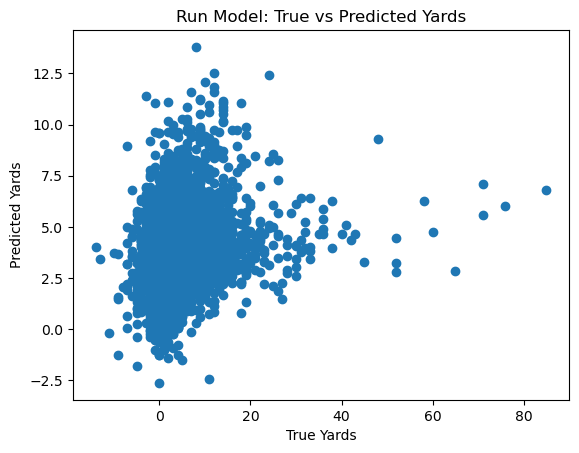

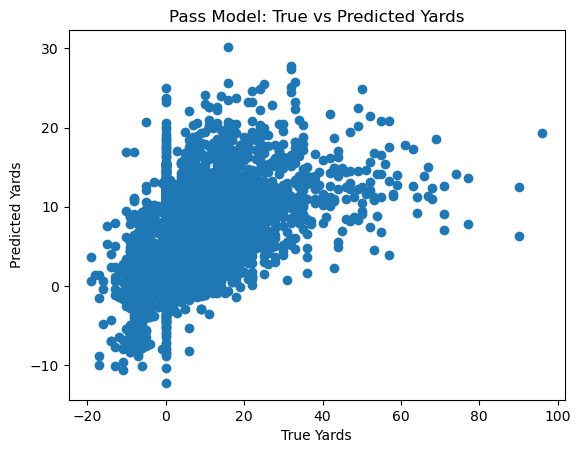

In [43]:
run_pipeline = preprocessor.make_preprocessing_pipeline()
pass_pipeline = preprocessor.make_preprocessing_pipeline()

# add model to pipeline
run_pipeline.steps.append(("gradientBoosting", xgb.XGBRegressor(learning_rate = 0.017,
                           n_estimators  = 1000,
                           max_depth     = 10,
                           eval_metric='rmsle')))
pass_pipeline.steps.append(("gradientBoosting", xgb.XGBRegressor(learning_rate = 0.017,
                           n_estimators  = 1000,
                           max_depth     = 10,
                           eval_metric='rmsle')))

run_pipeline.fit(run_X_train, run_y_train)

pass_pipeline.fit(pass_X_train, pass_y_train)

# Make predictions on the test set
run_predictions = run_pipeline.predict(run_X_test)
pass_predictions = pass_pipeline.predict(pass_X_test)

run_mse = mean_squared_error(run_y_test, run_predictions)
pass_mse = mean_squared_error(pass_y_test, pass_predictions)

run_rmse = mean_squared_error(run_y_test, run_predictions, squared = False)
pass_rmse = mean_squared_error(pass_y_test, pass_predictions, squared = False)

run_msa = mean_absolute_error(run_y_test, run_predictions)
pass_msa = mean_absolute_error(pass_y_test, pass_predictions)

print(f"Run Model Mean Squared Error: {run_mse}")
print(f"Pass Model Mean Squared Error: {pass_mse}")
print(f"Run Model Mean Absolute Error: {run_msa}")
print(f"Pass Model Mean Absolute Error: {pass_msa}")
print(f"Run Model Root Mean Squared Error: {run_rmse}")
print(f"Pass Model Root Mean Squared Error: {pass_rmse}")

print(f"Run Model Mean Squared Error: {run_mse}")
print(f"Pass Model Mean Squared Error: {pass_mse}")

# Visualize predictions for runs
plt.scatter(run_y_test, run_predictions)
plt.title('Run Model: True vs Predicted Yards')
plt.xlabel('True Yards')
plt.ylabel('Predicted Yards')
plt.show()

# Visualize predictions for passes
plt.scatter(pass_y_test, pass_predictions)
plt.title('Pass Model: True vs Predicted Yards')
plt.xlabel('True Yards')
plt.ylabel('Predicted Yards')
plt.show()

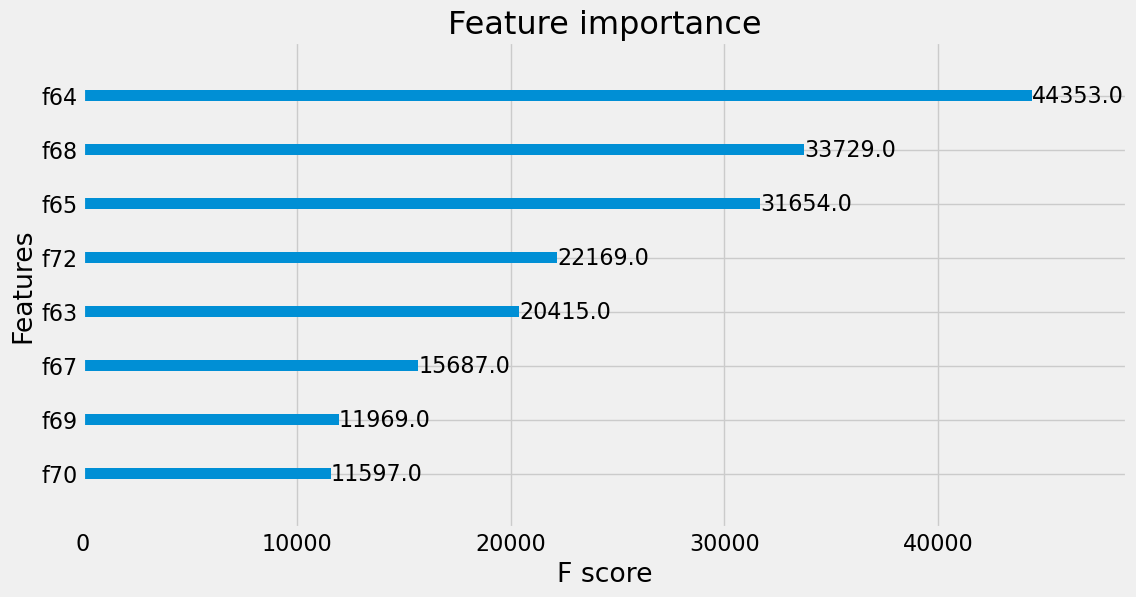

In [48]:

from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(run_pipeline.steps[1][1], max_num_features=8, ax=ax)
plt.show();


In [62]:
run_pipeline.steps[1][1].feature_importances_
#run_pipeline.steps[1][1].n_features_in_
run_pipeline.steps[1][1].get_booster().get_fscore()

{'f0': 1926.0,
 'f1': 1992.0,
 'f2': 2031.0,
 'f3': 1709.0,
 'f4': 1531.0,
 'f5': 1841.0,
 'f6': 1740.0,
 'f7': 1461.0,
 'f8': 2045.0,
 'f9': 1589.0,
 'f10': 1338.0,
 'f11': 1480.0,
 'f12': 2176.0,
 'f13': 1736.0,
 'f14': 1651.0,
 'f15': 1406.0,
 'f16': 1757.0,
 'f17': 1531.0,
 'f18': 1337.0,
 'f19': 1332.0,
 'f20': 1685.0,
 'f21': 1289.0,
 'f22': 1378.0,
 'f23': 1288.0,
 'f24': 1610.0,
 'f25': 1538.0,
 'f26': 1324.0,
 'f27': 1439.0,
 'f28': 1455.0,
 'f29': 1327.0,
 'f30': 5656.0,
 'f31': 1119.0,
 'f32': 578.0,
 'f33': 555.0,
 'f34': 928.0,
 'f35': 607.0,
 'f36': 793.0,
 'f37': 805.0,
 'f38': 914.0,
 'f39': 672.0,
 'f40': 977.0,
 'f41': 803.0,
 'f42': 859.0,
 'f43': 803.0,
 'f44': 917.0,
 'f45': 510.0,
 'f46': 647.0,
 'f47': 737.0,
 'f48': 656.0,
 'f49': 790.0,
 'f50': 813.0,
 'f51': 729.0,
 'f52': 810.0,
 'f53': 654.0,
 'f54': 892.0,
 'f55': 644.0,
 'f56': 616.0,
 'f57': 1105.0,
 'f58': 676.0,
 'f59': 630.0,
 'f60': 909.0,
 'f61': 1458.0,
 'f62': 539.0,
 'f63': 20415.0,
 'f64': 44353.

Functions for cross validation

In [4]:
def get_pipeline():
    return

def test_model(pipeline, x_train, y_train, x_test, y_test):
    pipeline.fit(x_train, y_train)

    # Make predictions on the test set
    predictions = pipeline.predict(x_test)

    # Evaluate the models
    pass_mse = mean_squared_error(y_test, predictions)
    pass_rmse = mean_squared_error(y_test, predictions, squared = False)
    pass_msa = mean_absolute_error(y_test, predictions)

    print(f"Mean Squared Error: {pass_mse}")
    print(f"Mean Absolute Error: {pass_msa}")
    print(f"Root Mean Squared Error: {pass_rmse}")
    return predictions

def visualize_predicts(y_test, predictions):
    # Visualize predictions for passes
    plt.scatter(y_test, predictions)
    plt.title('Pass Model: True vs Predicted Yards')
    plt.xlabel('True Yards')
    plt.ylabel('Predicted Yards')
    plt.show()

def test_model_k_fold(df, pipeline, data_fraction, scoring, k_folds=5):
    features, target = split_feature_target(df, data_fraction)
    
    cv_results = cross_val_predict(pipeline, features, target, cv=k_folds, scoring=scoring)
    #print(f"Run Model Cross-Validation Mean Squared Error: {-np.mean(cv_scores)}")
    #print(f"Run Model Cross-Validation Mean Squared Error: {-np.max(cv_scores)}")
    return cv_results

def estimate_hyperparams(df, pipeline, data_fraction, scoring, k_folds=5, parameters={}):
    features, target = split_feature_target(df, data_fraction)
    
    # specify the cross validation
    stratified_k_fold_cv = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

    # create the grid search instance
    grid_search_estimator = GridSearchCV(pipeline, parameters, scoring=scoring, cv=stratified_k_fold_cv, return_train_score=False)

    # run the grid search
    grid_search_estimator.fit(features, target)

    return grid_search_estimator

Linear Regression

In [27]:
df = get_data('pass')

model = LinearRegression()
test_model_k_fold(df, model, 0.1, 'neg_root_mean_squared_error')

TypeError: cross_val_predict() got an unexpected keyword argument 'scoring'

Polynomial Regression

In [28]:
df = get_data('pass')

pipeline = Pipeline([('polynomial', PolynomialFeatures()), ('model', LinearRegression())])
#test_model_k_fold(df, pipeline, 0.1, 'neg_root_mean_squared_error')
parameters = {
    'polynomial__degree': [2, 3]
}

estimator = estimate_hyperparams(df, pipeline, 0.05, 'neg_root_mean_squared_error', k_folds=3, parameters=parameters)

/Users/I538906/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


KNN

In [6]:
df = get_data('pass')

model = KNeighborsRegressor()
pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)])
parameters = {
    'model__n_neighbors': range(2, 10)
}

estimator = estimate_hyperparams(df, pipeline, 0.5, 'neg_root_mean_squared_error', k_folds=3, parameters=parameters)

results = pd.DataFrame(estimator.cv_results_)
display(results)
display(estimator.best_index_)
display(estimator.best_params_)
display(estimator.best_score_)
display(estimator.best_estimator_)

/Users/I538906/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.151259,0.025875,12.087913,0.315457,2,{'model__n_neighbors': 2},-5.397286,-5.414899,-5.396343,-5.402843,0.008534,8
1,0.120374,0.000464,12.770289,0.266311,3,{'model__n_neighbors': 3},-5.169541,-5.184215,-5.166476,-5.173411,0.007741,7
2,0.125820,0.005930,13.121450,0.037888,4,{'model__n_neighbors': 4},-5.064298,-5.074235,-5.056870,-5.065134,0.007114,6
3,0.130004,0.006834,13.893667,0.194654,5,{'model__n_neighbors': 5},-5.015320,-5.033534,-5.016087,-5.021647,0.008411,4
4,0.124819,0.004381,13.507821,0.082332,6,{'model__n_neighbors': 6},-5.006914,-5.022220,-4.993278,-5.007471,0.011822,1
5,0.129628,0.002628,13.549334,0.025375,7,{'model__n_neighbors': 7},-5.007233,-5.024610,-4.997522,-5.009789,0.011205,2
6,0.121437,0.001183,13.813207,0.108531,8,{'model__n_neighbors': 8},-5.011680,-5.027974,-5.005813,-5.015155,0.009375,3
7,0.135153,0.009685,14.338839,0.130089,9,{'model__n_neighbors': 9},-5.023401,-5.037109,-5.014578,-5.025029,0.009270,5


4

{'model__n_neighbors': 6}

-5.0074708194509725

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsRegressor(n_neighbors=6))])

1. create an instance of the NFLPreprocessing class by providing a list of csv files and optionally the size of the test set
2. this instance contains the following attributes (marked with * are especially important for further usage such as model development):

    - combined_df = dataframes of all years combined into one large dataframe
    - run_df = complete run dataframe
    - pass_df = complete pass dataframe
    -  run_test = run test dataframe
    * (run_train = run train dataframe)
    * (pass_test = pass test dataframe)
    * (pass_train = pass train dataframe)
    - encoder = Pipeline of one hot encoding
    - minmax_scaler = Pipeline of min max scaler
    - standardizer = Pipeline of standardizer
    - prepro = Column Transformer of the previous three

3. the instance contains the following methods (marked with * are especially important for further usage such as model development):

    - make_combined_df(self, csv_file_list: list): combines the dataframes from the list into one
    - drop_irrelevant_observations(self): drops observations which are not relevant for our case
    - insert_missing_values(self): inserts missing values for roof attribute
    - drop_irrelevant_features(self): drops irrelevant features, such as ids and names
    - clear_nas(self): removes remaining NAs
    - split_into_run_and_pass_dataframes(self): splits combined_df into run and passing dataframe depending on the play_type attribute
    - split_into_test_and_training_dataframes(
            self, df: pd.DataFrame, test_size: float = 0.25
        ): splits the provided dataframe into test and training dataset depending on the provided test_size
    - outlier_removal(self, training_df, factor_iqr: float = 3.0): removes outliers on the provided training_df according to the optionally provided iqr factor
    - make_encoder(self): makes Pipeline of one hot encoding
    - make_standardizer(self): makes Pipeline of min max scaler
    - make_minmax_scaler(self): makes Pipeline of standard scaler
    - make_preprocessor(self): makes Column Transformer of the previous three
    * (make_preprocessing_pipeline(self): returns a Pipeline object by providing the steps stored in self.prepro)
    * (get_prepro_feature_names_from_pipeline(self) -> list: returns the feature names from the ColumnTransformer containing the preprocessing pipeline steps)
    * (get_dataframe_from_preprocessing_pipeline(self,
        pipeline: sklearn.pipeline.Pipeline,
        datafrme_to_be_transformed: pd.DataFrame,
        ) -> pd.DataFrame: returns a pandas Dataframe with the provided pipeline applied to the provided dataframe)


In [25]:
preprocessing_pipeline = NFLPreprocessing(file_list=CSV_LIST)


2023-11-29 10:09:01.107 | INFO     | preprocessing:__init__:61 - --- Executing Preprocessing Steps ---
2023-11-29 10:09:01.109 | INFO     | preprocessing:make_combined_df:162 - Loading csv files
/Users/I538906/Documents/GitHub/NFL_play_prediction/preprocessing.py:167: DtypeWarning: Columns (36,37,179,180,189,190,197,198,203,204,205,206,213,214,218,219,220,222,224,226,248,249,253,254,255,260,262,263,266,267,268,269,283,284) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
/Users/I538906/Documents/GitHub/NFL_play_prediction/preprocessing.py:167: DtypeWarning: Columns (37,45,179,180,182,183,189,190,193,194,197,198,203,204,205,206,218,219,220,248,249,253,254,255,260,262,263,283,284) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
/Users/I538906/Documents/GitHub/NFL_play_prediction/preprocessing.py:167: DtypeWarning: Columns (37,179,180,182,183,189,190,193,194,197,198,203,204,205,206

In [27]:
(run_X_train, run_X_test, run_y_train, run_y_test), (features, target) = get_data_for_model(preprocessing_pipeline.run_df, 1)
(pass_X_train, pass_X_test, pass_y_train, pass_y_test), (features, target) = get_data_for_model(preprocessing_pipeline.pass_df, 1)
pass_X_train

,index,season_type,posteam,posteam_type,defteam,yardline_100,game_seconds_remaining,down,goal_to_go,ydstogo,...,td_prob,first_down_rush,first_down_pass,season,drive_play_count,drive_start_yard_line,spread_line,total_line,div_game,roof
1291,47951,POST,NE,home,PHI,17.0,657.0,1.0,0.0,10,...,0.585449,0.0,0.0,2017,10.0,NE 25,4.5,48.5,0,dome
394,49384,POST,SF,away,DAL,88.0,1455.0,2.0,0.0,5,...,0.305171,0.0,0.0,2021,7.0,SF 7,-3.0,51.0,0,closed
1247,50405,POST,LA,home,SF,57.0,2609.0,2.0,0.0,10,...,0.400295,0.0,0.0,2021,18.0,LA 3,3.5,45.5,1,dome
54,48809,POST,SF,home,SEA,41.0,2473.0,1.0,0.0,10,...,0.440062,0.0,0.0,2022,10.0,SF 25,10.0,42.0,1,outdoors
1100,48290,POST,JAX,home,LAC,26.0,1848.0,4.0,0.0,1,...,0.228025,0.0,1.0,2022,7.0,LAC 47,-2.0,46.5,0,outdoors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,49629,POST,BUF,away,KC,27.0,120.0,4.0,0.0,13,...,0.060186,0.0,1.0,2021,17.0,BUF 25,-2.5,54.0,0,outdoors
1130,49495,POST,KC,home,BUF,64.0,3063.0,1.0,0.0,10,...,0.448851,0.0,0.0,2021,11.0,KC 26,2.5,54.0,0,outdoors
1294,49127,POST,PIT,away,KC,66.0,3039.0,2.0,0.0,6,...,0.361800,0.0,1.0,2021,5.0,PIT 30,-13.0,46.0,0,outdoors
860,50002,POST,TB,home,LA,58.0,229.0,1.0,0.0,10,...,0.298865,0.0,0.0,2021,3.0,TB 23,2.5,48.0,0,outdoors


In [28]:
(run_X_train, run_X_test, run_y_train, run_y_test), (features, target) = get_data_for_model(preprocessing_pipeline.run_df, 0.3)
(pass_X_train, pass_X_test, pass_y_train, pass_y_test), (features, target) = get_data_for_model(preprocessing_pipeline.pass_df, 0.3)

run_regressor=xgb.XGBRegressor(learning_rate = 0.017,
                           n_estimators  = 1000,
                           max_depth     = 10,
                           eval_metric='rmsle')

run_regressor.fit(run_X_train, run_y_train)

pass_regressor=xgb.XGBRegressor(learning_rate = 0.022,
                           n_estimators  = 1000,
                           max_depth     = 10,
                           eval_metric='rmsle')

pass_regressor.fit(pass_X_train, pass_y_train)

#=========================================================================
# To use early_stopping_rounds: 
# "Validation metric needs to improve at least once in every 
# early_stopping_rounds round(s) to continue training."
#=========================================================================
# first perform a test/train split 
#from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size = 0.2)
#regressor.fit(X_train, y_train, early_stopping_rounds=6, eval_set=[(X_test, y_test)], verbose=False)

#=========================================================================
# use the model to predict the prices for the test data
#=========================================================================
run_predictions = run_regressor.predict(run_X_test)
pass_predictions = pass_regressor.predict(pass_X_test)


# Make predictions on the test set
#pass_predictions = pass_rf_regressor.predict(pass_X_test)
#run_predictions = run_rf_regressor.predict(run_X_test)

# Evaluate the model
run_mse = mean_squared_error(run_y_test, run_predictions)
pass_mse = mean_squared_error(pass_y_test, pass_predictions)

run_rmse = mean_squared_error(run_y_test, run_predictions, squared = False)
pass_rmse = mean_squared_error(pass_y_test, pass_predictions, squared = False)

run_msa = mean_absolute_error(run_y_test, run_predictions)
pass_msa = mean_absolute_error(pass_y_test, pass_predictions)

print(f"Run Model Mean Squared Error: {run_mse}")
print(f"Pass Model Mean Squared Error: {pass_mse}")
print(f"Run Model Mean Absolute Error: {run_msa}")
print(f"Pass Model Mean Absolute Error: {pass_msa}")
print(f"Run Model Root Mean Squared Error: {run_rmse}")
print(f"Pass Model Root Mean Squared Error: {pass_rmse}")

print(f"Run Model Mean Squared Error: {run_mse}")
print(f"Pass Model Mean Squared Error: {pass_mse}")

# Visualize predictions for runs
plt.scatter(run_y_test, run_predictions)
plt.title('Run Model: True vs Predicted Yards')
plt.xlabel('True Yards')
plt.ylabel('Predicted Yards')
plt.show()

# Visualize predictions for passes
plt.scatter(pass_y_test, pass_predictions)
plt.title('Pass Model: True vs Predicted Yards')
plt.xlabel('True Yards')
plt.ylabel('Predicted Yards')
plt.show()

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:season_type: object, posteam: object, posteam_type: object, defteam: object, drive_start_yard_line: object, roof: object

In [30]:
model = xgb.XGBRegressor()
pipeline = Pipeline([('model', model)])
parameters = {
    "max_depth":    [4, 5, 6, 8, 10],
    "n_estimators": [500, 600, 700, 800, 900],
    "learning_rate": [0.01, 0.015, 0.017, 0.02]
}

estimator = estimate_hyperparams(df, pipeline, 0.1, 'neg_root_mean_squared_error', k_folds=3, parameters=parameters)



results = pd.DataFrame(estimator.cv_results_)
display(results)
display(estimator.best_index_)
display(estimator.best_params_)
display(estimator.best_score_)
display(estimator.best_estimator_)

/Users/I538906/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


ValueError: Invalid parameter 'learning_rate' for estimator Pipeline(steps=[('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [31]:
import xgboost as xgb

(x_train, x_test, y_train, y_test), (features, target) = prepare_model_data(0.1, True)

#=========================================================================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor=xgb.XGBRegressor(eval_metric='rmsle')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [8, 10],
              "n_estimators": [1000, 1100],
              "learning_rate": [0.022, 0.015]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(x_train, y_train)

print("The best hyperparameters are ",search.best_params_)

#run_X_train, run_X_test, run_y_train, run_y_test = train_test_split(run_features, run_target, test_size=0.2, random_state=42)
#pass_X_train, pass_X_test, pass_y_train, pass_y_test = train_test_split(pass_features, pass_target, test_size=0.2, random_state=42)


The best hyperparameters are  {'learning_rate': 0.015, 'max_depth': 8, 'n_estimators': 1000}


Run Model Mean Squared Error: 6.37651742067914
Run Model Mean Absolute Error: 1.6535688913746571
Run Model Root Mean Squared Error: 2.5251767107826613
Run Model Mean Squared Error: 6.37651742067914


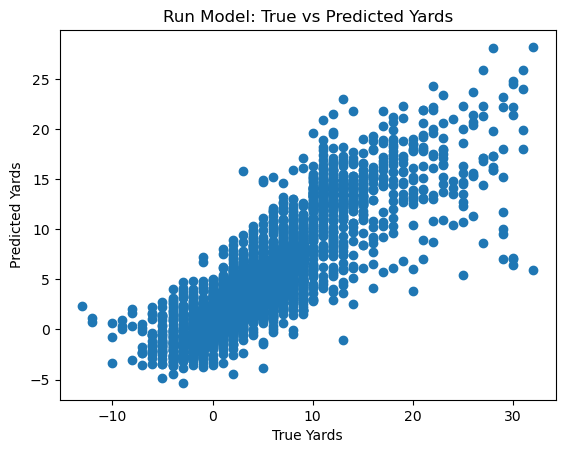

In [40]:
(run_X_train, run_X_test, run_y_train, run_y_test), (features, target) = prepare_model_data(0.1, True)

run_regressor=xgb.XGBRegressor(learning_rate = 0.017,
                           n_estimators  = 1000,
                           max_depth     = 10,
                           eval_metric='rmsle')

run_regressor.fit(run_X_train, run_y_train)

#pass_regressor=xgb.XGBRegressor(learning_rate = 0.022,
#                           n_estimators  = 1000,
#                           max_depth     = 10,
#                           eval_metric='rmsle')
#
#pass_regressor.fit(pass_X_train, pass_y_train)

#=========================================================================
# To use early_stopping_rounds: 
# "Validation metric needs to improve at least once in every 
# early_stopping_rounds round(s) to continue training."
#=========================================================================
# first perform a test/train split 
#from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size = 0.2)
#regressor.fit(X_train, y_train, early_stopping_rounds=6, eval_set=[(X_test, y_test)], verbose=False)

#=========================================================================
# use the model to predict the prices for the test data
#=========================================================================
run_predictions = run_regressor.predict(run_X_test)
#pass_predictions = pass_regressor.predict(pass_X_test)


# Make predictions on the test set
#pass_predictions = pass_rf_regressor.predict(pass_X_test)
#run_predictions = run_rf_regressor.predict(run_X_test)

# Evaluate the model
run_mse = mean_squared_error(run_y_test, run_predictions)
#pass_mse = mean_squared_error(pass_y_test, pass_predictions)

run_rmse = mean_squared_error(run_y_test, run_predictions, squared = False)
#pass_rmse = mean_squared_error(pass_y_test, pass_predictions, squared = False)

run_msa = mean_absolute_error(run_y_test, run_predictions)
#pass_msa = mean_absolute_error(pass_y_test, pass_predictions)

print(f"Run Model Mean Squared Error: {run_mse}")
#print(f"Pass Model Mean Squared Error: {pass_mse}")
print(f"Run Model Mean Absolute Error: {run_msa}")
#print(f"Pass Model Mean Absolute Error: {pass_msa}")
print(f"Run Model Root Mean Squared Error: {run_rmse}")
#print(f"Pass Model Root Mean Squared Error: {pass_rmse}")

print(f"Run Model Mean Squared Error: {run_mse}")
#print(f"Pass Model Mean Squared Error: {pass_mse}")

# Visualize predictions for runs
plt.scatter(run_y_test, run_predictions)
plt.title('Run Model: True vs Predicted Yards')
plt.xlabel('True Yards')
plt.ylabel('Predicted Yards')
plt.show()

# Visualize predictions for passes
#plt.scatter(pass_y_test, pass_predictions)
#plt.title('Pass Model: True vs Predicted Yards')
#plt.xlabel('True Yards')
#plt.ylabel('Predicted Yards')
#plt.show()

In [13]:
import xgboost as xgb

(x_train, x_test, y_train, y_test), (features, target) = prepare_model_data(0.1, True)

#=========================================================================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor=xgb.XGBRegressor(eval_metric='rmsle')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [8, 10, 12],
              "n_estimators": [700, 800, 900],
              "learning_rate": [0.015, 0.017, 0.02]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(x_train, y_train)

print("The best hyperparameters are ",search.best_params_)

#run_X_train, run_X_test, run_y_train, run_y_test = train_test_split(run_features, run_target, test_size=0.2, random_state=42)
#pass_X_train, pass_X_test, pass_y_train, pass_y_test = train_test_split(pass_features, pass_target, test_size=0.2, random_state=42)


The best hyperparameters are  {'learning_rate': 0.017, 'max_depth': 8, 'n_estimators': 900}


Pass Model Mean Squared Error: 9.475984181161754
Pass Model Mean Absolute Error: 2.02604422572061
Pass Model Root Mean Squared Error: 3.078308655928082
Pass Model Mean Squared Error: 9.475984181161754


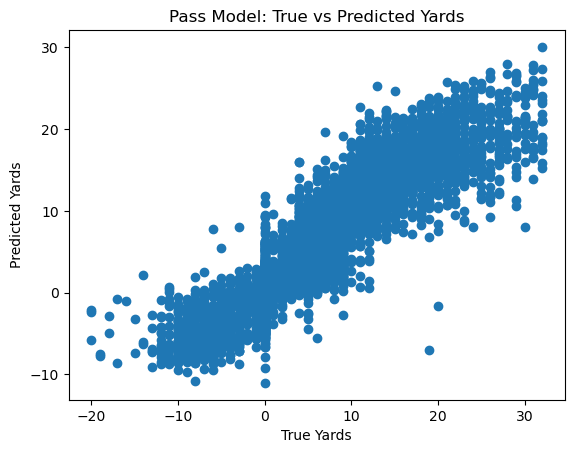

In [27]:
(pass_X_train, pass_X_test, pass_y_train, pass_y_test), (features, target) = prepare_model_data(0.1, True)

#run_regressor=xgb.XGBRegressor(learning_rate = 0.015,
#                           n_estimators  = 700,
#                           max_depth     = 6,
#                           eval_metric='rmsle')

#run_regressor.fit(run_X_train, run_y_train)

pass_regressor=xgb.XGBRegressor(learning_rate = 0.022,
                           n_estimators  = 1000,
                           max_depth     = 10,
                           eval_metric='rmsle')

pass_regressor.fit(pass_X_train, pass_y_train)

#=========================================================================
# To use early_stopping_rounds: 
# "Validation metric needs to improve at least once in every 
# early_stopping_rounds round(s) to continue training."
#=========================================================================
# first perform a test/train split 
#from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size = 0.2)
#regressor.fit(X_train, y_train, early_stopping_rounds=6, eval_set=[(X_test, y_test)], verbose=False)

#=========================================================================
# use the model to predict the prices for the test data
#=========================================================================
#run_predictions = run_regressor.predict(run_X_test)
pass_predictions = pass_regressor.predict(pass_X_test)


# Make predictions on the test set
#pass_predictions = pass_rf_regressor.predict(pass_X_test)
#run_predictions = run_rf_regressor.predict(run_X_test)

# Evaluate the model
#run_mse = mean_squared_error(run_y_test, run_predictions)
pass_mse = mean_squared_error(pass_y_test, pass_predictions)

#run_rmse = mean_squared_error(run_y_test, run_predictions, squared = False)
pass_rmse = mean_squared_error(pass_y_test, pass_predictions, squared = False)

#run_msa = mean_absolute_error(run_y_test, run_predictions)
pass_msa = mean_absolute_error(pass_y_test, pass_predictions)

#print(f"Run Model Mean Squared Error: {run_mse}")
print(f"Pass Model Mean Squared Error: {pass_mse}")
#print(f"Run Model Mean Absolute Error: {run_msa}")
print(f"Pass Model Mean Absolute Error: {pass_msa}")
#print(f"Run Model Root Mean Squared Error: {run_rmse}")
print(f"Pass Model Root Mean Squared Error: {pass_rmse}")

#print(f"Run Model Mean Squared Error: {run_mse}")
print(f"Pass Model Mean Squared Error: {pass_mse}")

# Visualize predictions for runs
#plt.scatter(run_y_test, run_predictions)
#plt.title('Run Model: True vs Predicted Yards')
#plt.xlabel('True Yards')
#plt.ylabel('Predicted Yards')
#plt.show()

# Visualize predictions for passes
plt.scatter(pass_y_test, pass_predictions)
plt.title('Pass Model: True vs Predicted Yards')
plt.xlabel('True Yards')
plt.ylabel('Predicted Yards')
plt.show()

In [ ]:
(x_train, x_test, y_train, y_test), (features, target) = prepare_model_data(0.1, True)

#=========================================================================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor=xgb.XGBRegressor(eval_metric='rmsle')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [8, 10, 12],
              "n_estimators": [700, 800, 900],
              "learning_rate": [0.015, 0.017, 0.02]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(x_train, y_train)

print("The best hyperparameters are ",search.best_params_)

Run Model Mean Squared Error: 6.651573979120218
Pass Model Mean Squared Error: 10.3056123605831
Run Model Mean Absolute Error: 1.7211844112995878
Pass Model Mean Absolute Error: 2.1628631479866964
Run Model Root Mean Squared Error: 2.5790645550509623
Pass Model Root Mean Squared Error: 3.2102355615411
Run Model Mean Squared Error: 6.651573979120218
Pass Model Mean Squared Error: 10.3056123605831


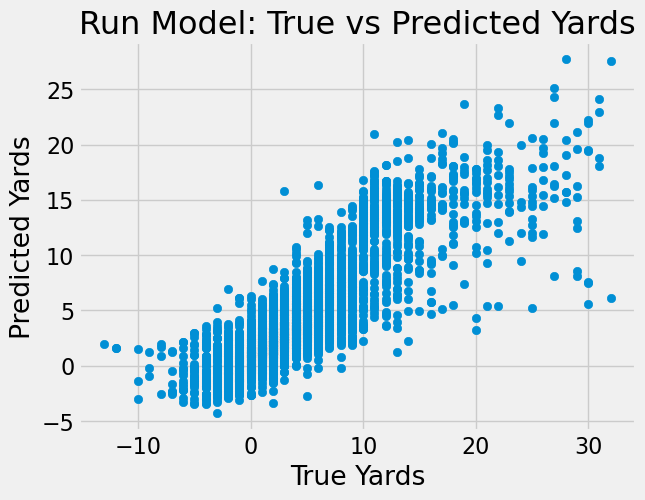

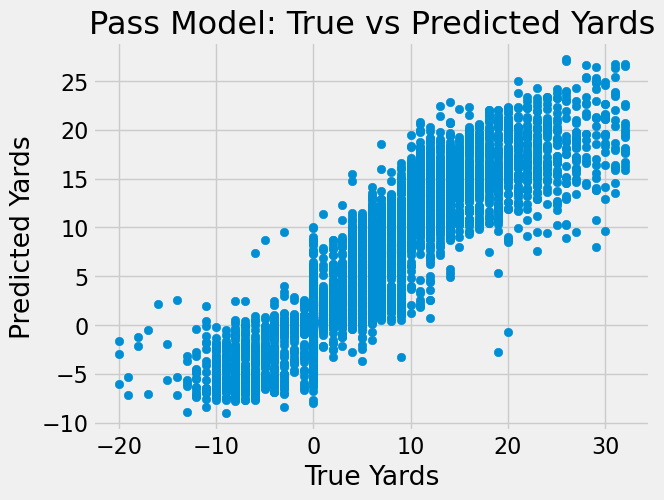

In [12]:
#regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
#                           n_estimators  = search.best_params_["n_estimators"],
#                           max_depth     = search.best_params_["max_depth"],
#                           eval_metric='rmsle')

run_regressor=xgb.XGBRegressor(learning_rate = 0.015,
                           n_estimators  = 700,
                           max_depth     = 6,
                           eval_metric='rmsle')

run_regressor.fit(run_X_train, run_y_train)

pass_regressor=xgb.XGBRegressor(learning_rate = 0.015,
                           n_estimators  = 700,
                           max_depth     = 6,
                           eval_metric='rmsle')

pass_regressor.fit(pass_X_train, pass_y_train)

#=========================================================================
# To use early_stopping_rounds: 
# "Validation metric needs to improve at least once in every 
# early_stopping_rounds round(s) to continue training."
#=========================================================================
# first perform a test/train split 
#from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size = 0.2)
#regressor.fit(X_train, y_train, early_stopping_rounds=6, eval_set=[(X_test, y_test)], verbose=False)

#=========================================================================
# use the model to predict the prices for the test data
#=========================================================================
run_predictions = run_regressor.predict(run_X_test)
pass_predictions = pass_regressor.predict(pass_X_test)


# Make predictions on the test set
#pass_predictions = pass_rf_regressor.predict(pass_X_test)
#run_predictions = run_rf_regressor.predict(run_X_test)

# Evaluate the model
run_mse = mean_squared_error(run_y_test, run_predictions)
pass_mse = mean_squared_error(pass_y_test, pass_predictions)

run_rmse = mean_squared_error(run_y_test, run_predictions, squared = False)
pass_rmse = mean_squared_error(pass_y_test, pass_predictions, squared = False)

run_msa = mean_absolute_error(run_y_test, run_predictions)
pass_msa = mean_absolute_error(pass_y_test, pass_predictions)

print(f"Run Model Mean Squared Error: {run_mse}")
print(f"Pass Model Mean Squared Error: {pass_mse}")
print(f"Run Model Mean Absolute Error: {run_msa}")
print(f"Pass Model Mean Absolute Error: {pass_msa}")
print(f"Run Model Root Mean Squared Error: {run_rmse}")
print(f"Pass Model Root Mean Squared Error: {pass_rmse}")

print(f"Run Model Mean Squared Error: {run_mse}")
print(f"Pass Model Mean Squared Error: {pass_mse}")

# Visualize predictions for runs
plt.scatter(run_y_test, run_predictions)
plt.title('Run Model: True vs Predicted Yards')
plt.xlabel('True Yards')
plt.ylabel('Predicted Yards')
plt.show()

# Visualize predictions for passes
plt.scatter(pass_y_test, pass_predictions)
plt.title('Pass Model: True vs Predicted Yards')
plt.xlabel('True Yards')
plt.ylabel('Predicted Yards')
plt.show()

# Access a specific tree from the forest (e.g., the first tree)
#tree_to_plot_pass = 0
#tree_to_plot_run = 0

# Access the decision tree from the Random Forest
#individual_tree_pass = pass_rf_regressor.estimators_[tree_to_plot_pass]
#individual_tree_run = run_rf_regressor.estimators_[tree_to_plot_run]

# Plot the decision tree for passes
#plt.figure(figsize=(15, 10))
#plot_tree(individual_tree_pass, filled=True, feature_names=pass_X_train.columns)
#plt.title('Decision Tree for Pass Model')
#plt.show()

# Plot the decision tree for runs
#plt.figure(figsize=(15, 10))
#plot_tree(individual_tree_run, filled=True, feature_names=run_X_train.columns)
#plt.title('Decision Tree for Run Model')
#plt.show()

# Cross-validation for runs
# run_cv_scores = cross_val_score(run_knn_regressor, run_features, run_target, cv=5, scoring='neg_mean_squared_error')
# print(f"Run Model Cross-Validation Mean Squared Error: {-np.mean(run_cv_scores)}")

# Cross-validation for passes
# pass_cv_scores = cross_val_score(pass_knn_regressor, pass_features, pass_target, cv=5, scoring='neg_mean_squared_error')
# print(f"Pass Model Cross-Validation Mean Squared Error: {-np.mean(pass_cv_scores)}")

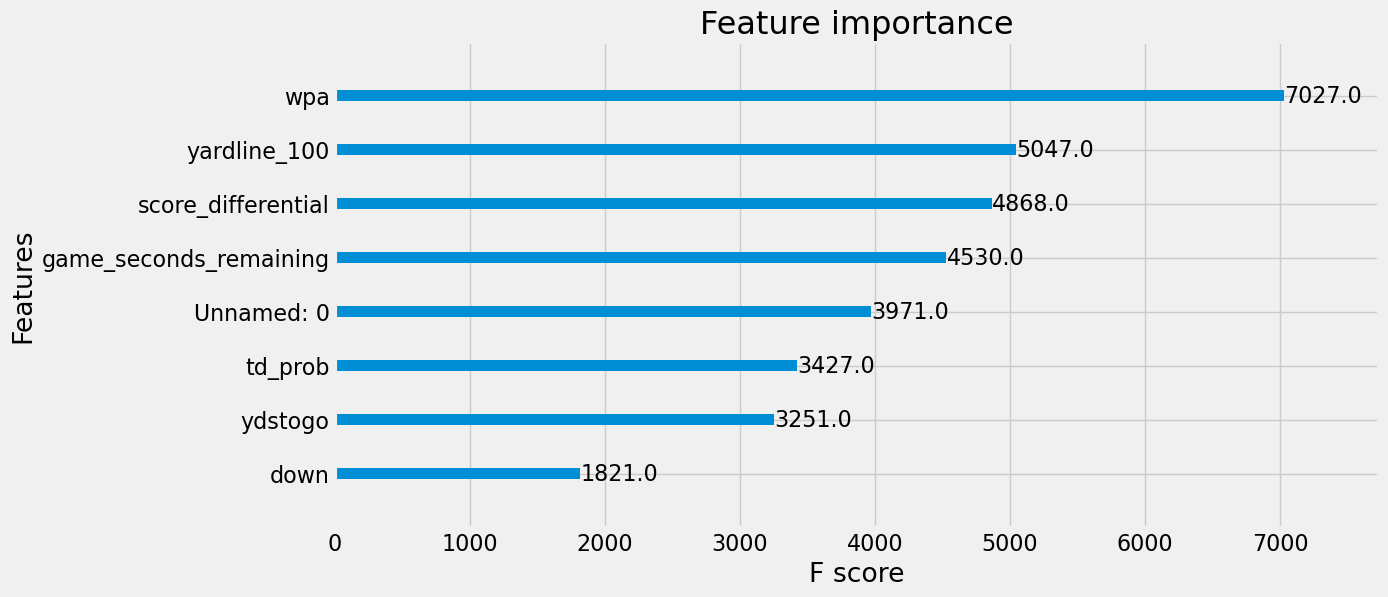

In [7]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(run_regressor, max_num_features=8, ax=ax)
plt.show();

#Where here the F score is a measure "...based on the number of times a variable is selected 
#for splitting, weighted by the squared improvement to the model as a result of each split, 
#and averaged over all trees." 

General parameters:
- booster[default = gbtree]
    - it helps us to select the type of model to run at each iteration.
    - It has 3 options - gbtree, gblinear or dart.
    - gbtree and dart always outperforms the linear booster and thus the later is rarely used.

Run Model Mean Squared Error: 6.353229599637598
Pass Model Mean Squared Error: 9.622849343754233
Run Model Mean Absolute Error: 1.6636799159984572
Pass Model Mean Absolute Error: 2.0518988693660454
Run Model Root Mean Squared Error: 2.520561365973381
Pass Model Root Mean Squared Error: 3.102071782495407
Run Model Mean Squared Error: 6.353229599637598
Pass Model Mean Squared Error: 9.622849343754233


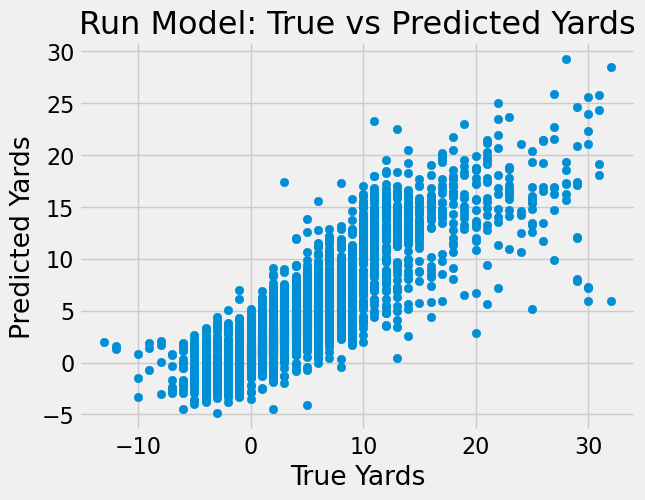

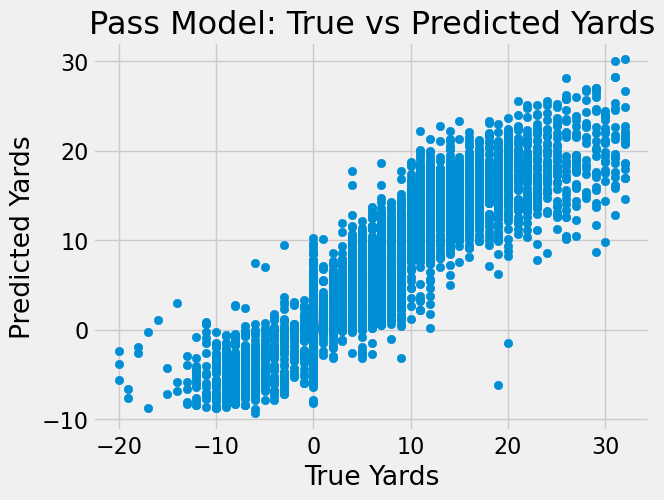

In [13]:
#run_regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
#                           n_estimators  = search.best_params_["n_estimators"],
#                           max_depth     = search.best_params_["max_depth"],
#                           eval_metric='rmsle')

run_regressor=xgb.XGBRegressor(learning_rate = 0.015,
                           n_estimators  = 700,
                           max_depth     = 8,
                           eval_metric='rmsle')

run_regressor.fit(run_X_train, run_y_train)

pass_regressor=xgb.XGBRegressor(learning_rate = 0.015,
                           n_estimators  = 700,
                           max_depth     = 8,
                           eval_metric='rmsle')

pass_regressor.fit(pass_X_train, pass_y_train)

#=========================================================================
# To use early_stopping_rounds: 
# "Validation metric needs to improve at least once in every 
# early_stopping_rounds round(s) to continue training."
#=========================================================================
# first perform a test/train split 
#from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size = 0.2)
#regressor.fit(X_train, y_train, early_stopping_rounds=6, eval_set=[(X_test, y_test)], verbose=False)

#=========================================================================
# use the model to predict the prices for the test data
#=========================================================================
run_predictions = run_regressor.predict(run_X_test)
pass_predictions = pass_regressor.predict(pass_X_test)


# Make predictions on the test set
#pass_predictions = pass_rf_regressor.predict(pass_X_test)
#run_predictions = run_rf_regressor.predict(run_X_test)

# Evaluate the model
run_mse = mean_squared_error(run_y_test, run_predictions)
pass_mse = mean_squared_error(pass_y_test, pass_predictions)

run_rmse = mean_squared_error(run_y_test, run_predictions, squared = False)
pass_rmse = mean_squared_error(pass_y_test, pass_predictions, squared = False)

run_msa = mean_absolute_error(run_y_test, run_predictions)
pass_msa = mean_absolute_error(pass_y_test, pass_predictions)

print(f"Run Model Mean Squared Error: {run_mse}")
print(f"Pass Model Mean Squared Error: {pass_mse}")
print(f"Run Model Mean Absolute Error: {run_msa}")
print(f"Pass Model Mean Absolute Error: {pass_msa}")
print(f"Run Model Root Mean Squared Error: {run_rmse}")
print(f"Pass Model Root Mean Squared Error: {pass_rmse}")

print(f"Run Model Mean Squared Error: {run_mse}")
print(f"Pass Model Mean Squared Error: {pass_mse}")

# Visualize predictions for runs
plt.scatter(run_y_test, run_predictions)
plt.title('Run Model: True vs Predicted Yards')
plt.xlabel('True Yards')
plt.ylabel('Predicted Yards')
plt.show()

# Visualize predictions for passes
plt.scatter(pass_y_test, pass_predictions)
plt.title('Pass Model: True vs Predicted Yards')
plt.xlabel('True Yards')
plt.ylabel('Predicted Yards')
plt.show()


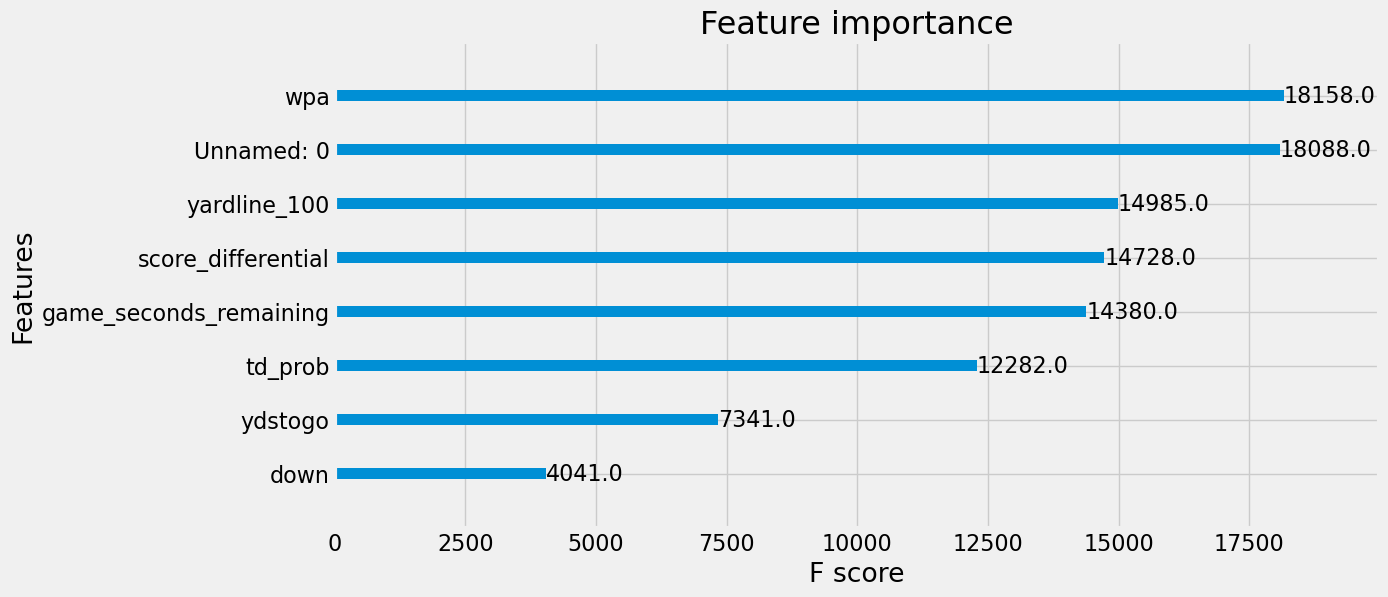

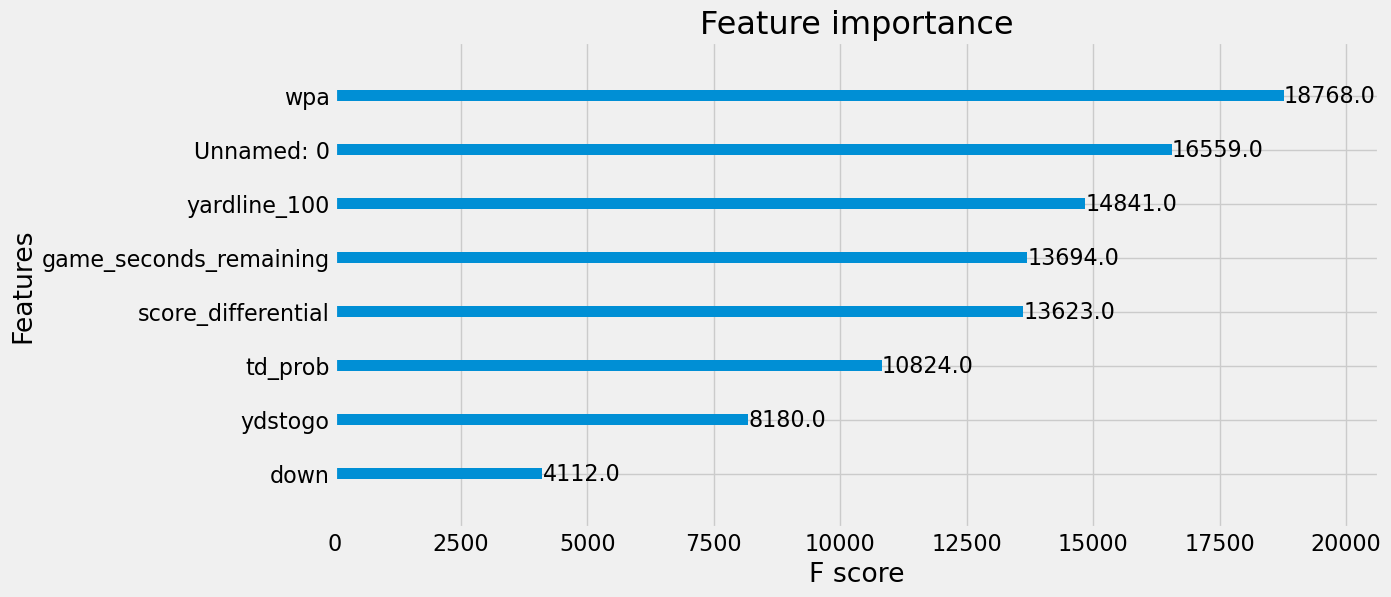

In [14]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(run_regressor, max_num_features=8, ax=ax)
plt.show();

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(pass_regressor, max_num_features=8, ax=ax)
plt.show();

#Where here the F score is a measure "...based on the number of times a variable is selected 
#for splitting, weighted by the squared improvement to the model as a result of each split, 
#and averaged over all trees." 

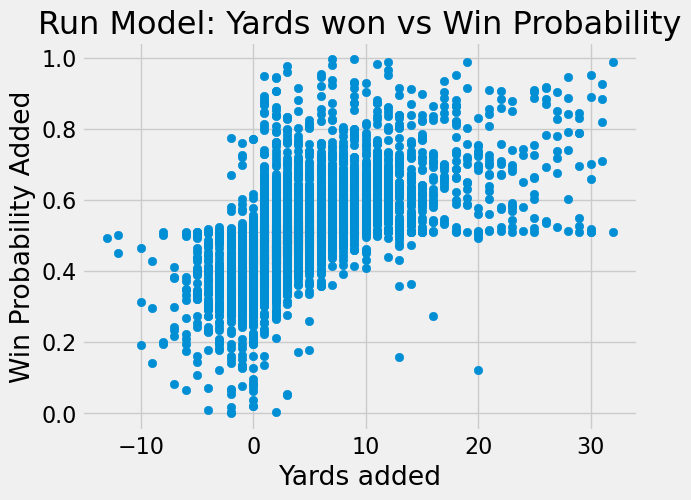

In [11]:

plt.scatter(run_y_test, run_X_test['wpa'])
plt.title('Run Model: Yards won vs Win Probability')
plt.xlabel('Yards added')
plt.ylabel('Win Probability Added')
plt.show()

Run Model Mean Squared Error: 6.353229551836823
Pass Model Mean Squared Error: 9.622849208928082
Run Model Mean Absolute Error: 1.6636799420330188
Pass Model Mean Absolute Error: 2.0518988855222133
Run Model Root Mean Squared Error: 2.520561356491213
Pass Model Root Mean Squared Error: 3.1020717607637773
Run Model Mean Squared Error: 6.353229551836823
Pass Model Mean Squared Error: 9.622849208928082


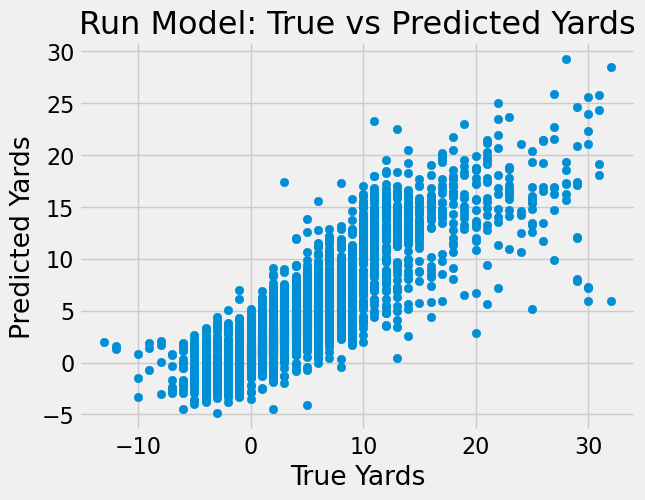

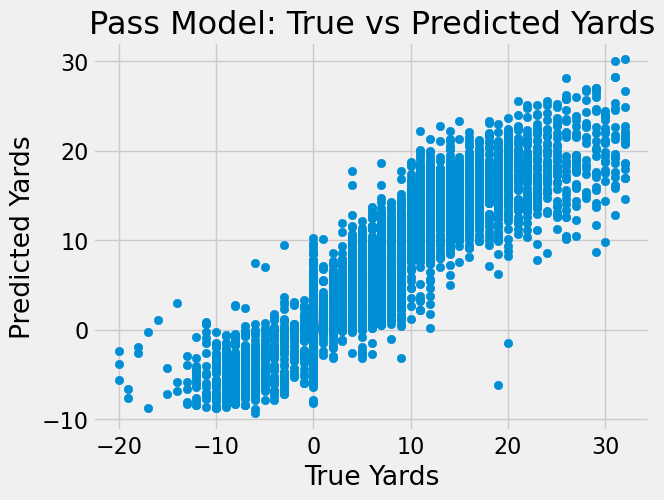

In [19]:
run_regressor_dart=xgb.XGBRegressor(learning_rate = 0.015,
                           n_estimators  = 700,
                           max_depth     = 8,
                           eval_metric='rmsle',
                           booster='dart')

run_regressor_dart.fit(run_X_train, run_y_train)

pass_regressor_dart=xgb.XGBRegressor(learning_rate = 0.015,
                           n_estimators  = 700,
                           max_depth     = 8,
                           eval_metric='rmsle',
                           booster='dart')

pass_regressor_dart.fit(pass_X_train, pass_y_train)

#=========================================================================
# To use early_stopping_rounds: 
# "Validation metric needs to improve at least once in every 
# early_stopping_rounds round(s) to continue training."
#=========================================================================
# first perform a test/train split 
#from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size = 0.2)
#regressor.fit(X_train, y_train, early_stopping_rounds=6, eval_set=[(X_test, y_test)], verbose=False)

#=========================================================================
# use the model to predict the prices for the test data
#=========================================================================
run_predictions_dart = run_regressor_dart.predict(run_X_test)
pass_predictions_dart = pass_regressor_dart.predict(pass_X_test)


# Make predictions on the test set
#pass_predictions = pass_rf_regressor.predict(pass_X_test)
#run_predictions = run_rf_regressor.predict(run_X_test)

# Evaluate the model
run_mse_dart = mean_squared_error(run_y_test, run_predictions_dart)
pass_mse_dart = mean_squared_error(pass_y_test, pass_predictions_dart)

run_rmse_dart = mean_squared_error(run_y_test, run_predictions_dart, squared = False)
pass_rmse_dart = mean_squared_error(pass_y_test, pass_predictions_dart, squared = False)

run_msa_dart = mean_absolute_error(run_y_test, run_predictions_dart)
pass_msa_dart = mean_absolute_error(pass_y_test, pass_predictions_dart)

print(f"Run Model Mean Squared Error: {run_mse_dart}")
print(f"Pass Model Mean Squared Error: {pass_mse_dart}")
print(f"Run Model Mean Absolute Error: {run_msa_dart}")
print(f"Pass Model Mean Absolute Error: {pass_msa_dart}")
print(f"Run Model Root Mean Squared Error: {run_rmse_dart}")
print(f"Pass Model Root Mean Squared Error: {pass_rmse_dart}")

print(f"Run Model Mean Squared Error: {run_mse_dart}")
print(f"Pass Model Mean Squared Error: {pass_mse_dart}")

# Visualize predictions for runs
plt.scatter(run_y_test, run_predictions_dart)
plt.title('Run Model: True vs Predicted Yards')
plt.xlabel('True Yards')
plt.ylabel('Predicted Yards')
plt.show()

# Visualize predictions for passes
plt.scatter(pass_y_test, pass_predictions_dart)
plt.title('Pass Model: True vs Predicted Yards')
plt.xlabel('True Yards')
plt.ylabel('Predicted Yards')
plt.show()

Run Model Mean Squared Error: 6.3911668981821315
Pass Model Mean Squared Error: 9.609892766812784
Run Model Mean Absolute Error: 1.6494845810626046
Pass Model Mean Absolute Error: 2.0220098342869344
Run Model Root Mean Squared Error: 2.528075730309939
Pass Model Root Mean Squared Error: 3.099982704276394
Run Model Mean Squared Error: 6.3911668981821315
Pass Model Mean Squared Error: 9.609892766812784


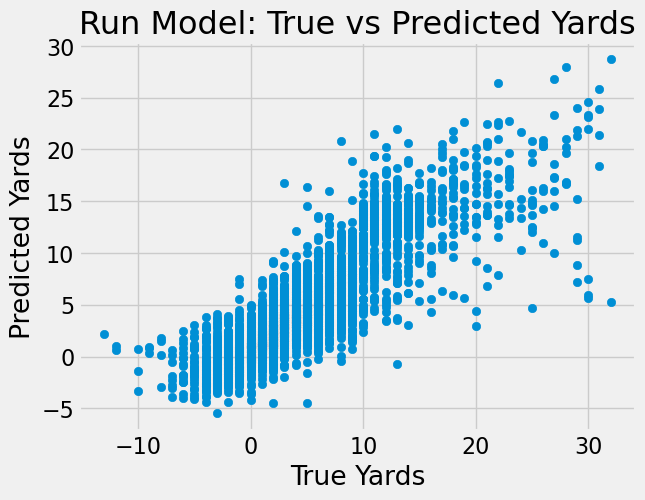

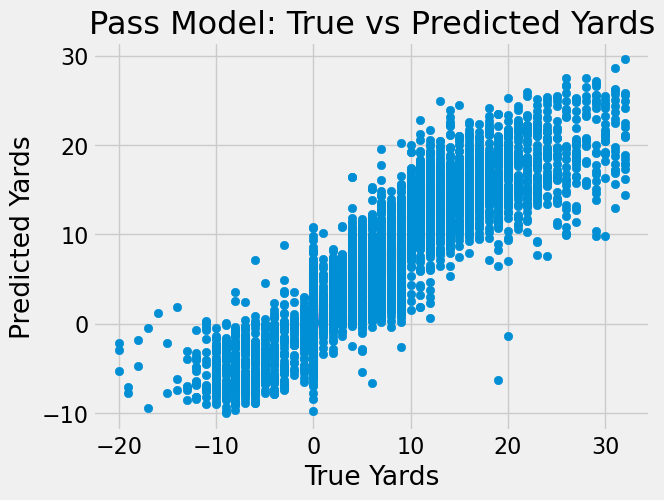

In [17]:
run_regressor_10=xgb.XGBRegressor(learning_rate = 0.015,
                           n_estimators  = 700,
                           max_depth     = 10,
                           eval_metric='rmsle')

run_regressor_10.fit(run_X_train, run_y_train)

pass_regressor_10=xgb.XGBRegressor(learning_rate = 0.015,
                           n_estimators  = 700,
                           max_depth     = 10,
                           eval_metric='rmsle')

pass_regressor_10.fit(pass_X_train, pass_y_train)

#=========================================================================
# To use early_stopping_rounds: 
# "Validation metric needs to improve at least once in every 
# early_stopping_rounds round(s) to continue training."
#=========================================================================
# first perform a test/train split 
#from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size = 0.2)
#regressor.fit(X_train, y_train, early_stopping_rounds=6, eval_set=[(X_test, y_test)], verbose=False)

#=========================================================================
# use the model to predict the prices for the test data
#=========================================================================
run_predictions_10 = run_regressor_10.predict(run_X_test)
pass_predictions_10 = pass_regressor_10.predict(pass_X_test)


# Make predictions on the test set
#pass_predictions = pass_rf_regressor.predict(pass_X_test)
#run_predictions = run_rf_regressor.predict(run_X_test)

# Evaluate the model
run_mse_10 = mean_squared_error(run_y_test, run_predictions_10)
pass_mse_10 = mean_squared_error(pass_y_test, pass_predictions_10)

run_rmse_10 = mean_squared_error(run_y_test, run_predictions_10, squared = False)
pass_rmse_10 = mean_squared_error(pass_y_test, pass_predictions_10, squared = False)

run_msa_10 = mean_absolute_error(run_y_test, run_predictions_10)
pass_msa_10 = mean_absolute_error(pass_y_test, pass_predictions_10)

print(f"Run Model Mean Squared Error: {run_mse_10}")
print(f"Pass Model Mean Squared Error: {pass_mse_10}")
print(f"Run Model Mean Absolute Error: {run_msa_10}")
print(f"Pass Model Mean Absolute Error: {pass_msa_10}")
print(f"Run Model Root Mean Squared Error: {run_rmse_10}")
print(f"Pass Model Root Mean Squared Error: {pass_rmse_10}")

print(f"Run Model Mean Squared Error: {run_mse_10}")
print(f"Pass Model Mean Squared Error: {pass_mse_10}")

# Visualize predictions for runs
plt.scatter(run_y_test, run_predictions_10)
plt.title('Run Model: True vs Predicted Yards')
plt.xlabel('True Yards')
plt.ylabel('Predicted Yards')
plt.show()

# Visualize predictions for passes
plt.scatter(pass_y_test, pass_predictions_10)
plt.title('Pass Model: True vs Predicted Yards')
plt.xlabel('True Yards')
plt.ylabel('Predicted Yards')
plt.show()